In [1]:
import numpy as np
import jPCA
import matplotlib.pyplot as plt
from jPCA.util import load_churchland_data, plot_projections

In [49]:
class JPCA_calc:
    def __init__(self, B, tstart=0.05, tend=0.75) -> None :
        datasB, timesB = load_churchland_data(B)

        # Create a jPCA object
        jpca = jPCA.JPCA(num_jpcs=6)

        self.jpca = jpca

        # Fit the jPCA object to data
        (projected, 
        full_data_var,
        pca_var_capt,
        jpca_var_capt) = jpca.fit(datasB, times=timesB, tstart=tstart, tend=tend) 

        self.full_data_var = full_data_var
        self.pca_var_capt = pca_var_capt
        self.jpca_var_capt =  jpca_var_capt

        freq = self.get_eigen()
        var = self.get_variance()

        fig, axes = plt.subplots(1, 3, figsize=(10, 5))

        # Plot projections
        plot_projections(projected, axis=axes[0], x_idx=0, y_idx=1)
        axes[0].set_title("jPCA Plane 1")
        axes[0].annotate(f"Var: {var[0]:.2f}, Freq: {freq[0]:.2f}", 
                        xy=(0.5, 1.1), xycoords='axes fraction', ha='center', fontsize=10)

        plot_projections(projected, axis=axes[1], x_idx=2, y_idx=3)
        axes[1].set_title("jPCA Plane 2")
        axes[1].annotate(f"Var: {var[1]:.2f}, Freq: {freq[2]:.2f}", 
                        xy=(0.5, 1.1), xycoords='axes fraction', ha='center', fontsize=10)

        plot_projections(projected, axis=axes[2], x_idx=0, y_idx=3)
        axes[2].set_title("jPCA Plane 3")
        axes[2].annotate(f"Var: {var[2]:.2f}, Freq: {freq[4]:.2f}", 
                        xy=(0.5, 1.1), xycoords='axes fraction', ha='center', fontsize=10)

        plt.tight_layout()
        plt.show()
        
    def get_variance(self):
        variance_ratios = self.jpca_var_capt / self.full_data_var

        paired_sums = [variance_ratios[i] + variance_ratios[i + 1] for i in range(0, len(variance_ratios) - 1, 2)]
        
        return paired_sums
    
    def get_eigen(self):
        
        # the eigen values contain no real elements
        angular_speeds = np.abs( np.round(np.linalg.eigvals(self.jpca.M_skew), 3))

        frequencies = angular_speeds / (2 * np.pi) 
        frequencies = frequencies * 100 # convert to seconds
        
        return frequencies


# Example

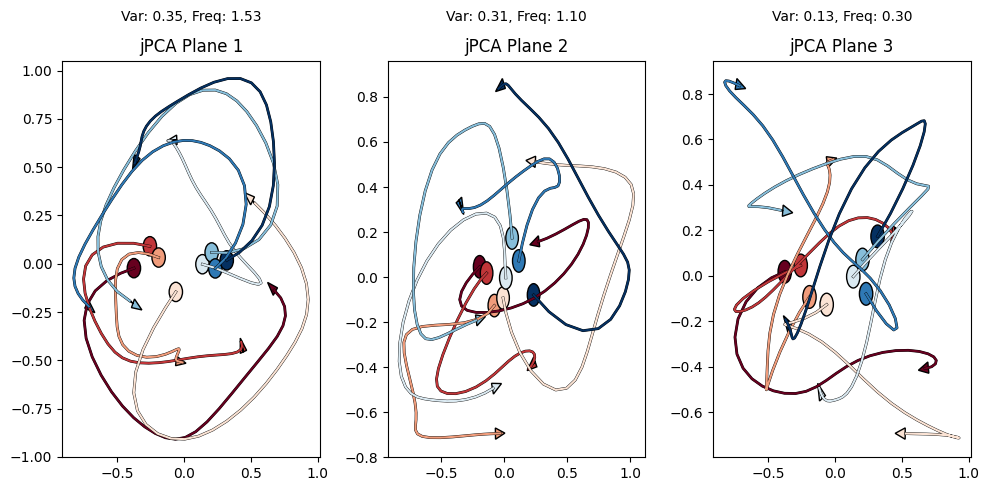

In [54]:
# Load publicly available data from Mark Churchland's group
A = "data/Patches_Data_S1.mat"

neural = JPCA_calc(A, tstart=-50, tend=240)

# Neural Data

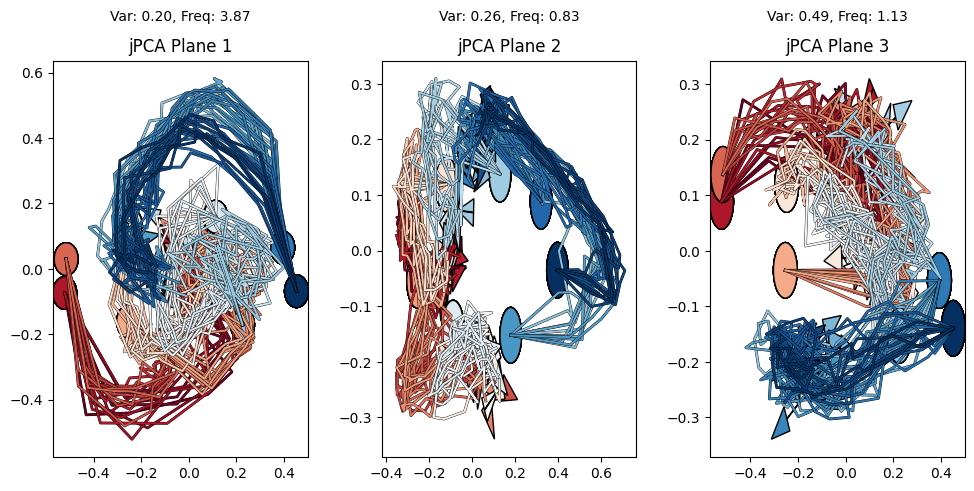

In [55]:
# Load publicly available data from Mark Churchland's group
A = "data/Neural_Data.mat"

neural = JPCA_calc(A)

# Muscle Activity Data

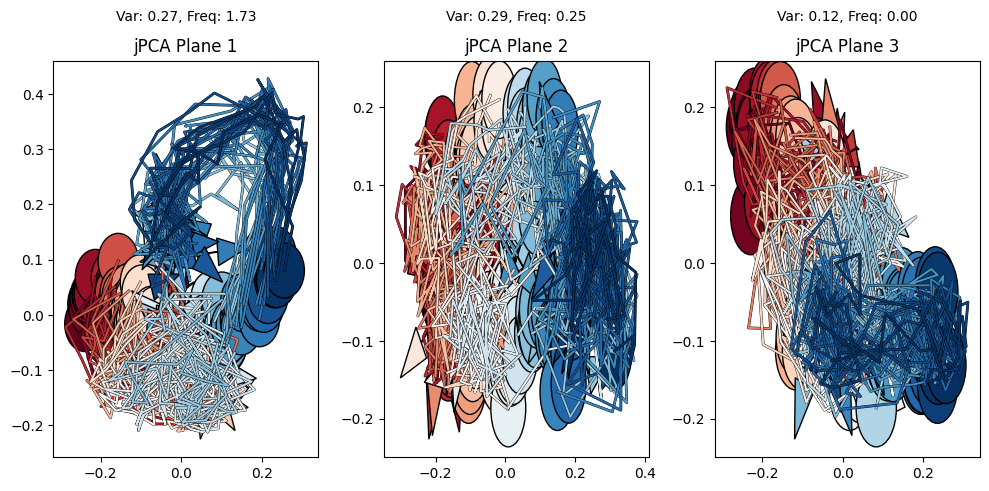

In [57]:
# Load publicly available data from Mark Churchland's group
A = "data/MuscleAct_Data.mat"


neural = JPCA_calc(A)

# Joint/Fiber Data (Velocity and length)

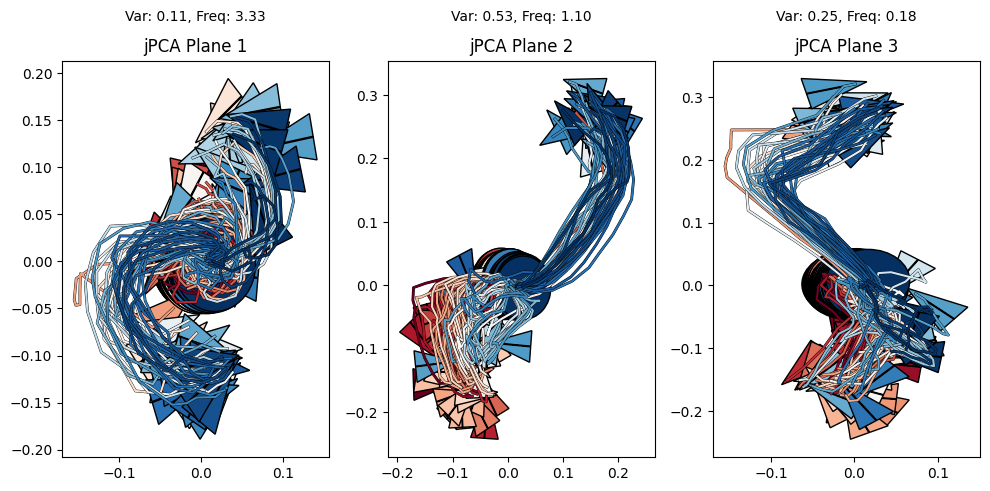

without variance:  [0.10612444908372104, 0.5345798048872324, 0.2522271885588865]
frequency:  [3.32633831 3.32633831 1.09816911 1.09816911 0.17507044 0.17507044]


In [59]:
# Load publicly available data from Mark Churchland's group
A = "data/FiberJoint_Data.mat"

neural = JPCA_calc(A)
print("without variance: ", neural.get_variance())
print("frequency: ", neural.get_eigen())
